In [43]:
import numpy as np
import scipy.stats as sps

In [44]:
#sample_x = sps.norm(loc = 1, scale = 2).rvs(size = 100)
#sample_y = sps.uniform(loc = -1, scale = 2).rvs(size = 100)

#np.savetxt("sample_x.csv", sample_x)
#np.savetxt("sample_y.csv", sample_y)

#print(sample_x[:5])
#print(sample_y[:5])

In [45]:
sample_x = np.genfromtxt('sample_x.csv')
sample_y = np.genfromtxt('sample_y.csv')

print(sample_x[:5])
print(sample_y[:5])

[-0.50923992  3.29344282  0.09373675  1.77306435  3.67978075]
[ 0.71832021 -0.95014244 -0.32900058  0.28553752  0.58886494]


In [46]:
def sample_value(sample, n):
    sample_mean = sample.mean()
    sample_var = sample.var() * n / (n - 1) 

    print("\tmean: %.3f" %sample_mean)
    print('\ts^2: %.3f' %sample_var)

def corr_coef(sample1, sample2):
    coef_pearson = sps.pearsonr(sample1, sample2)
    coef_spearman = sps.spearmanr(sample1, sample2)
    coef_tau = sps.kendalltau(sample1, sample2)

    print("Pearson:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_pearson[0], coef_pearson[1]))
    print("Spearman:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_spearman[0], coef_spearman[1]))
    print("Tau:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_tau[0], coef_tau[1]))

In [47]:
#1
print("X:")
sample_value(sample_x, 100)

print("Y:")
sample_value(sample_y, 100)
print("\n")

corr_coef(sample_x, sample_y)

X:
	mean: 1.328
	s^2: 3.561
Y:
	mean: 0.052
	s^2: 0.311


Pearson:
	statistics: -0.037
	p-value: 0.718
Spearman:
	statistics: -0.009
	p-value: 0.932
Tau:
	statistics: -0.008
	p-value: 0.900


In [48]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

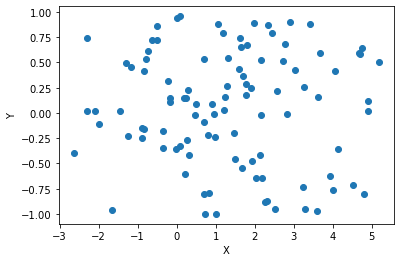

In [49]:
#2
plt.scatter(sample_x, sample_y)
plt.xlabel("X")
plt.ylabel("Y")

Frequency: 
 [[1. 2. 4. 2. 1.]
 [0. 7. 8. 4. 6.]
 [5. 5. 7. 8. 6.]
 [7. 1. 2. 5. 5.]
 [4. 1. 3. 2. 4.]]
X borders:  [-2.62856419 -1.06772997  0.49310425  2.05393847  3.61477269  5.17560691]
Y borders:  [-0.99866394 -0.60763994 -0.21661593  0.17440808  0.56543209  0.95645609]


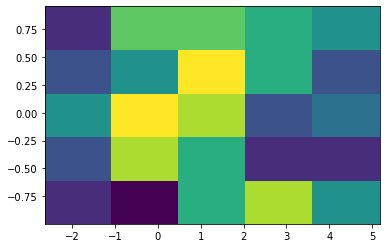

In [55]:
#3
result = plt.hist2d(sample_x, sample_y, bins= 5)
print("Frequency: \n", result[0])
print("X borders: ", result[1])
print("Y borders: ", result[2])

In [59]:
frequency = result[0]
result2 = sps.chi2_contingency(frequency)
print("Z: %.3f" %result2[0])
print("p-value: %.3f" %result2[1])
print("Frequency: \n", result2[3])

Z: 19.699
p-value: 0.234
Frequency: 
 [[1.7  1.6  2.4  2.1  2.2 ]
 [4.25 4.   6.   5.25 5.5 ]
 [5.27 4.96 7.44 6.51 6.82]
 [3.4  3.2  4.8  4.2  4.4 ]
 [2.38 2.24 3.36 2.94 3.08]]


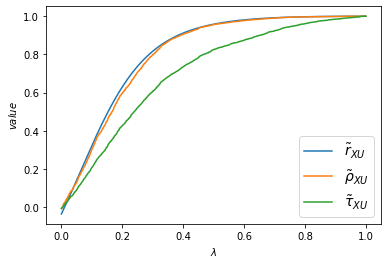

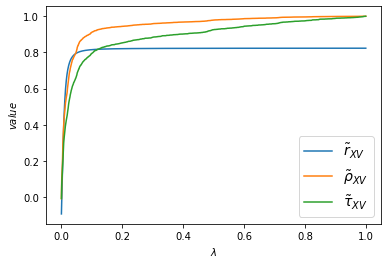

In [91]:
#4
l = np.linspace(0, 1, 2000)

coef_pearson_xu = []
coef_spearman_xu = []
coef_tau_xu = []

coef_pearson_xv = []
coef_spearman_xv = []
coef_tau_xv = []

for value_l in l:
    u = value_l * sample_x + (1 - value_l) * sample_y
    v = value_l * (sample_x**3) + (1 - value_l) * (sample_y**3)

    coef_pearson_xu.append(sps.pearsonr(sample_x, u)[0])
    coef_spearman_xu.append(sps.spearmanr(sample_x, u)[0])
    coef_tau_xu.append(sps.kendalltau(sample_x, u)[0])

    coef_pearson_xv.append(sps.pearsonr(sample_x, v)[0])
    coef_spearman_xv.append(sps.spearmanr(sample_x, v)[0])
    coef_tau_xv.append(sps.kendalltau(sample_x, v)[0])

plt.plot(l, coef_pearson_xu, label=r'$\tilde r_{XU}$')
plt.plot(l, coef_spearman_xu, label=r'$\tilde \rho_{XU}$')
plt.plot(l, coef_tau_xu, label=r'$\tilde \tau_{XU}$')
plt.legend(fontsize = 14)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$value$')
plt.show()

plt.plot(l, coef_pearson_xv, label=r'$\tilde r_{XV}$')
plt.plot(l, coef_spearman_xv, label=r'$\tilde \rho_{XV}$')
plt.plot(l, coef_tau_xv, label=r'$\tilde \tau_{XV}$')
plt.legend(fontsize = 14)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$value$')
plt.show()

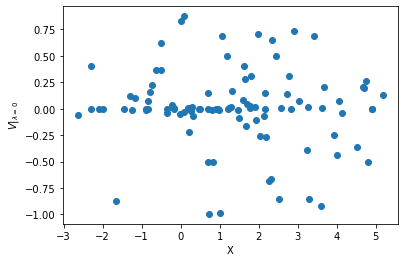

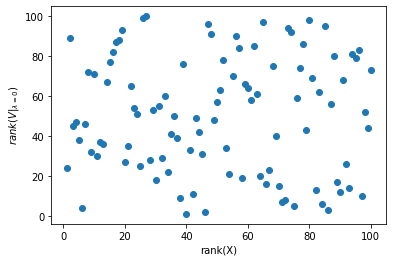

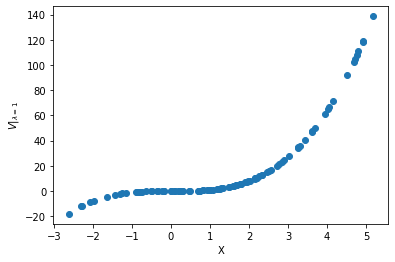

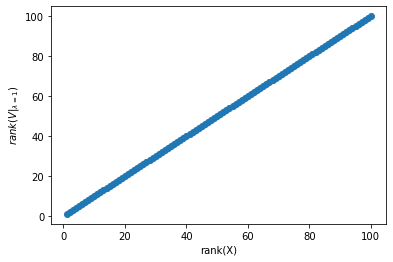

In [103]:
v0 = sample_y**3
v1 = sample_x**3

rank_x = sps.rankdata(sample_x)
rank_v0 = sps.rankdata(v0)
rank_v1 = sps.rankdata(v1)

plt.scatter(sample_x, v0)
plt.xlabel("X")
plt.ylabel(r'$V |_{\lambda = 0}$')
plt.show()

plt.scatter(rank_x, rank_v0)
plt.xlabel("rank(X)")
plt.ylabel(r'$rank( V |_{\lambda = 0}) $')
plt.show()

plt.scatter(sample_x, v1)
plt.xlabel("X")
plt.ylabel(r'$V |_{\lambda = 1}$')
plt.show()

plt.scatter(rank_x, rank_v1)
plt.xlabel("rank(X)")
plt.ylabel(r'$rank( V |_{\lambda = 1}) $')
plt.show()